## 1.2 데이터 읽기와 확인

In [3]:
import pandas as pd

bank_df = pd.read_csv('dataset/bank.csv', sep=',')
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,36,technician,single,secondary,no,265,yes,yes,NaN,5,may,348,1,-1,0,NaN,no
2,25,blue-collar,married,secondary,no,-7,yes,no,NaN,5,may,365,1,-1,0,NaN,no
3,53,technician,married,secondary,no,-3,no,no,NaN,5,may,1666,1,-1,0,NaN,no
4,24,technician,single,secondary,no,-103,yes,yes,NaN,5,may,145,1,-1,0,NaN,no


### 연습문제1

In [5]:
bank_df.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
7224,63,retired,married,primary,no,3738,no,no,telephone,9,nov,301,1,456,4,failure,no
7225,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success,yes
7226,33,admin.,single,secondary,no,690,no,no,cellular,10,nov,223,3,555,16,failure,no
7227,36,admin.,single,tertiary,no,980,no,no,cellular,11,nov,118,4,104,7,failure,no
7228,38,entrepreneur,single,secondary,no,2543,no,no,cellular,11,nov,357,3,93,5,success,yes
7229,25,services,single,secondary,no,199,no,no,cellular,16,nov,173,1,92,5,failure,no
7230,28,self-employed,single,tertiary,no,159,no,no,cellular,16,nov,449,2,33,4,success,yes
7231,59,management,married,tertiary,no,138,yes,yes,cellular,16,nov,162,2,187,5,failure,no
7232,37,management,married,tertiary,no,1428,no,no,cellular,16,nov,333,2,-1,0,NaN,no
7233,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,NaN,yes


### 데이터의 행수와 열수 확인

In [10]:
print(bank_df.shape)

(7234, 17)


### 데이터 형 확인

In [11]:
print(bank_df.dtypes)

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


## 1.3 결손값의 확인

### 결손값의 포함 유무 확인

In [13]:
print(bank_df.isnull().any(axis=1)) # 행방향 결손값 유무 조사
print(bank_df.isnull().any(axis=0)) # 열방향 결손값 유무 조사

0        True
1        True
2        True
3        True
4        True
        ...  
7229    False
7230    False
7231    False
7232     True
7233     True
Length: 7234, dtype: bool
age          False
job           True
marital      False
education     True
default      False
balance      False
housing      False
loan         False
contact       True
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome      True
y            False
dtype: bool


### 결손값의 개수 파악

In [15]:
print(bank_df.isnull().sum(axis=1))
print(bank_df.isnull().sum(axis=0))

0       2
1       2
2       2
3       2
4       2
       ..
7229    0
7230    0
7231    0
7232    1
7233    1
Length: 7234, dtype: int64
age             0
job            44
marital         0
education     273
default         0
balance         0
housing         0
loan            0
contact      2038
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     5900
y               0
dtype: int64


In [26]:
print(bank_df.isnull().sum(axis=1).sort_values(ascending=False))
print(bank_df.isnull().sum(axis=0).sort_values(ascending=False))

139     4
1762    4
1670    4
1814    4
1904    4
       ..
4667    0
4669    0
6038    0
6037    0
4047    0
Length: 7234, dtype: int64
poutcome     5900
contact      2038
education     273
job            44
month           0
previous        0
pdays           0
campaign        0
duration        0
age             0
day             0
loan            0
housing         0
balance         0
default         0
marital         0
y               0
dtype: int64


## 1.4 통계량 계산

### 데이터형의 수치 항목의 통계량 계산

In [16]:
bank_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,7234.000000,7234.000000,7234.000000,7234.000000,7234.000000,7234.000000,7234.000000
mean,40.834808,1374.912911,15.623860,262.875311,2.713989,40.277716,0.565939
std,10.706442,3033.882933,8.307826,268.921065,2.983740,99.188008,1.825100
min,2.000000,-3313.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,74.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,453.500000,16.000000,183.000000,2.000000,-1.000000,0.000000
75%,48.000000,1470.750000,21.000000,321.750000,3.000000,-1.000000,0.000000
max,157.000000,81204.000000,31.000000,3366.000000,44.000000,850.000000,40.000000


### 연습문제3

In [28]:
bank_df.describe(include=object) #top(최빈치), freq(최빈치의 출현횟수)

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,7190,7234,6961,7234,7234,7234,5196,7234,1334,7234
unique,11,3,3,2,2,2,2,12,3,2
top,management,married,secondary,no,yes,no,cellular,may,failure,no
freq,1560,4343,3745,7101,4058,6066,4697,2202,772,6381


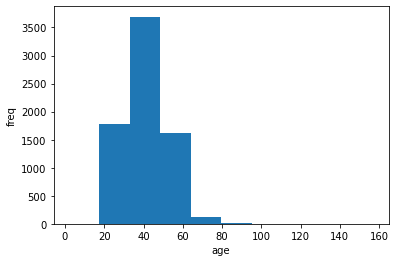

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(bank_df['age'])
plt.xlabel('age')
plt.ylabel('freq')
plt.show()

### 연습문제4 

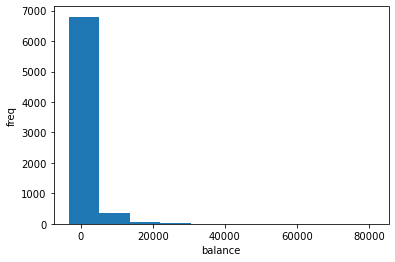

In [31]:
plt.hist(bank_df['balance'])
plt.xlabel('balance')
plt.ylabel('freq')
plt.show()

## age와 blance 산포도 작성과 항목 관련성 확인


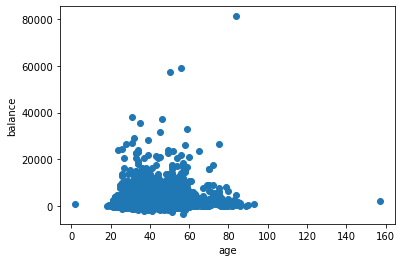

,age,balance
age,1.000000,0.112364
balance,0.112364,1.000000


In [33]:
plt.scatter(bank_df['age'], bank_df['balance'])
plt.xlabel('age')
plt.ylabel('balance')
plt.show()

bank_df[['age', 'balance']].corr()
# 절대값이 클수록 두 항목의 관련성이 강하고 절대값이 작을수록 두 항목의 관련성은 약해진다.
# 공선성(Collinearity) 변수(항목) 상호 간에 강하게 상관해 발생하는 문제-> 계산량의 증대 , 모델의 성능 저하, 모델의 불안정화 등

### 연습문제5

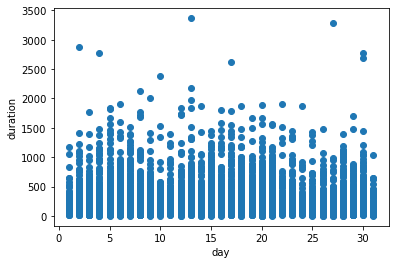

,day,duration
day,1.000000,-0.031867
duration,-0.031867,1.000000


In [34]:
plt.scatter(bank_df['day'], bank_df['duration'])
plt.xlabel('day')
plt.ylabel('duration')
plt.show()

bank_df[['day', 'duration']].corr()

### 문자열 항목 중 job의 원 그래프 작성(1)

In [43]:
print(bank_df['job'].value_counts(ascending=False, normalize=True))
# normalize=True는 발생횟수가 1이 되도록 정규화하는 명령어

management       0.216968
blue-collar      0.208484
technician       0.167733
admin.           0.115994
services         0.091933
retired          0.048818
self-employed    0.035605
entrepreneur     0.033241
unemployed       0.031015
housemaid        0.028929
student          0.021280
Name: job, dtype: float64


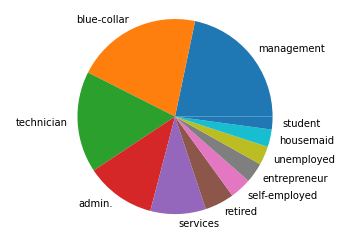

In [42]:
job_label = bank_df['job'].value_counts(ascending=False, normalize=True).index
job_vals = bank_df['job'].value_counts(ascending=False, normalize=True).values

plt.pie(job_vals, labels=job_label)
plt.axis('equal')
plt.show()

### y의 원 그래프 작성 및 데이터 분포 확인

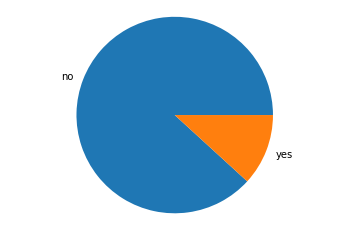

In [44]:
y_label = bank_df['y'].value_counts(ascending=False, normalize=True).index
y_vals = bank_df['y'].value_counts(ascending=False, normalize=True).values

plt.pie(y_vals, labels=y_label)
plt.axis('equal')
plt.show()

## 1.6 데이터 시각화(2)


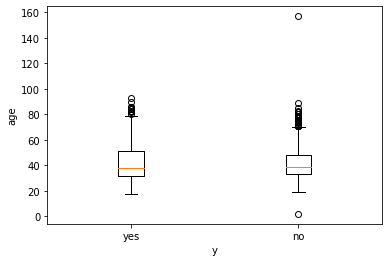

In [52]:
y_yes = bank_df[bank_df['y'] == 'yes']
y_no = bank_df[bank_df['y'] == 'no']
y_age = [y_yes['age'], y_no['age']]

plt.boxplot(y_age)
plt.xlabel('y')
plt.ylabel('age')
ax = plt.gca()
plt.setp(ax, xticklabels=['yes', 'no'])
plt.show()

### 연습문제7

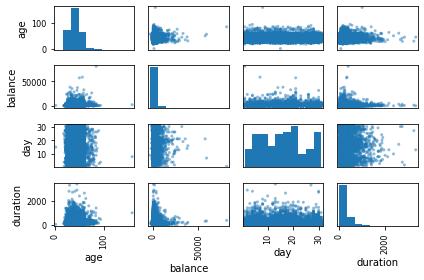

In [55]:
pd.plotting.scatter_matrix(bank_df[['age', 'balance', 'day', 'duration']])
plt.tight_layout()
plt.show()